# Evaluador
***

In [1]:
%matplotlib inline

In [3]:
from darkflow.net.build import TFNet
import cv2

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


## Cargamos YOLO

In [7]:
options = {"model": "yolo-new.cfg", "load": "tiny-yolo-voc.weights", "threshold": 0.1}
#options = {"model": "cfg/yolo.cfg", "load": "bin/yolo.weights", "threshold": 0.1}

tfnet = TFNet(options)

Parsing ./cfg/tiny-yolo-voc.cfg
Parsing yolo-new.cfg
Loading tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.023258209228515625s


## Cargamos algunas imágenes

In [8]:
results = []
images = []
images_path = ["./000001.jpg",
               "./varios.jpg",
               "./test/dog.jpg",
               "./dogs.jpg", 
               "./selfie2.jpg"]

for image_path in images_path:
    images.append(cv2.imread(image_path))
    results.append(tfnet.return_predict(images[len(images)-1]))

## Las mostramos

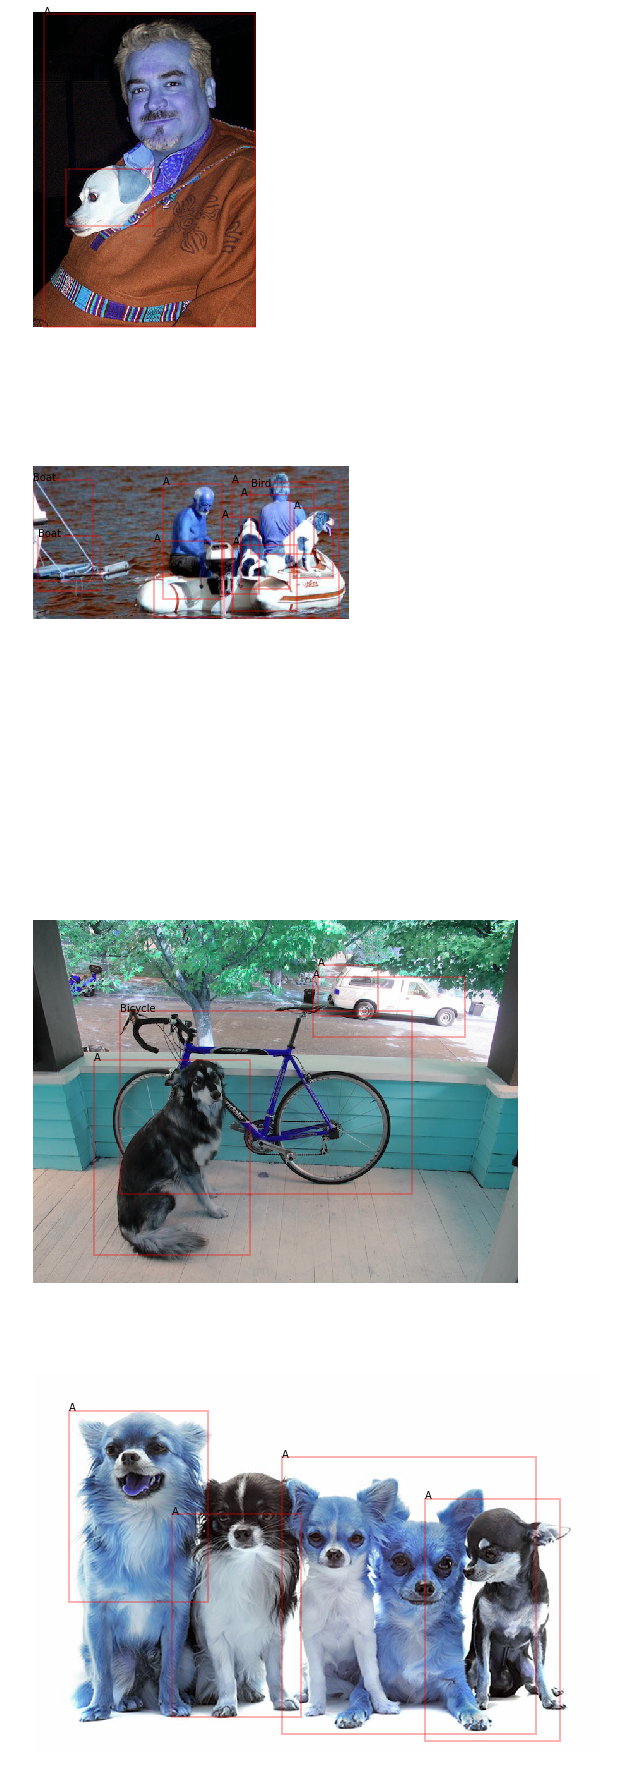

In [9]:
# Mostramos las imagenes resultantes
fig, axes = plt.subplots(nrows=4, figsize=(32, 32), sharex=True,
                         sharey=True, subplot_kw={'adjustable':'box-forced'})

for result, ax, img in zip(results, axes, images):    
    ax.imshow(img)
    ax.axis('off')
    for label in result:
        topleft = label['topleft']
        bottomright = label['bottomright']

        height = bottomright['y'] - topleft['y']
        width = bottomright['x'] - topleft['x']

        coord = [topleft['x'], topleft['y'], width, height]

        ax.add_patch(plt.Rectangle((topleft['x'], topleft['y']), width, height, edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
        ax.annotate(label['label'].capitalize(), xy=(topleft['x'], topleft['y']), xytext=(topleft['x'], topleft['y']))

In [ ]:
print(results)